<a href="https://www.kaggle.com/code/avijo9/gradient-boosting-model-v1?scriptVersionId=98563733" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

A Gradient Boosting Classifier Model to Predict whether the asteroid is harmful or not.

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

/kaggle/input/nasa-nearest-earth-objects/neo.csv


In [2]:
df=pd.read_csv('../input/nasa-nearest-earth-objects/neo.csv')

In [3]:
df.info() # Data looks complete without null elements.
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90836 entries, 0 to 90835
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  90836 non-null  int64  
 1   name                90836 non-null  object 
 2   est_diameter_min    90836 non-null  float64
 3   est_diameter_max    90836 non-null  float64
 4   relative_velocity   90836 non-null  float64
 5   miss_distance       90836 non-null  float64
 6   orbiting_body       90836 non-null  object 
 7   sentry_object       90836 non-null  bool   
 8   absolute_magnitude  90836 non-null  float64
 9   hazardous           90836 non-null  bool   
dtypes: bool(2), float64(5), int64(1), object(2)
memory usage: 5.7+ MB


,id,name,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,orbiting_body,sentry_object,absolute_magnitude,hazardous
0,2162635,162635 (2000 SS164),1.198271,2.679415,13569.249224,5.483974e+07,Earth,False,16.73,False
1,2277475,277475 (2005 WK4),0.265800,0.594347,73588.726663,6.143813e+07,Earth,False,20.00,True
2,2512244,512244 (2015 YE18),0.722030,1.614507,114258.692129,4.979872e+07,Earth,False,17.83,False
3,3596030,(2012 BV13),0.096506,0.215794,24764.303138,2.543497e+07,Earth,False,22.20,False
4,3667127,(2014 GE35),0.255009,0.570217,42737.733765,4.627557e+07,Earth,False,20.09,True


In [4]:
print(df.orbiting_body.unique()) # Orbiting body is Earth as expected
print(df.sentry_object.unique()) # All false. Included in sentry - an automated collision monitoring system.

['Earth']
[False]


In [5]:
df.describe()

,id,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,absolute_magnitude
count,9.083600e+04,90836.000000,90836.000000,90836.000000,9.083600e+04,90836.000000
mean,1.438288e+07,0.127432,0.284947,48066.918918,3.706655e+07,23.527103
std,2.087202e+07,0.298511,0.667491,25293.296961,2.235204e+07,2.894086
min,2.000433e+06,0.000609,0.001362,203.346433,6.745533e+03,9.230000
25%,3.448110e+06,0.019256,0.043057,28619.020645,1.721082e+07,21.340000
50%,3.748362e+06,0.048368,0.108153,44190.117890,3.784658e+07,23.700000
75%,3.884023e+06,0.143402,0.320656,62923.604633,5.654900e+07,25.700000
max,5.427591e+07,37.892650,84.730541,236990.128088,7.479865e+07,33.200000


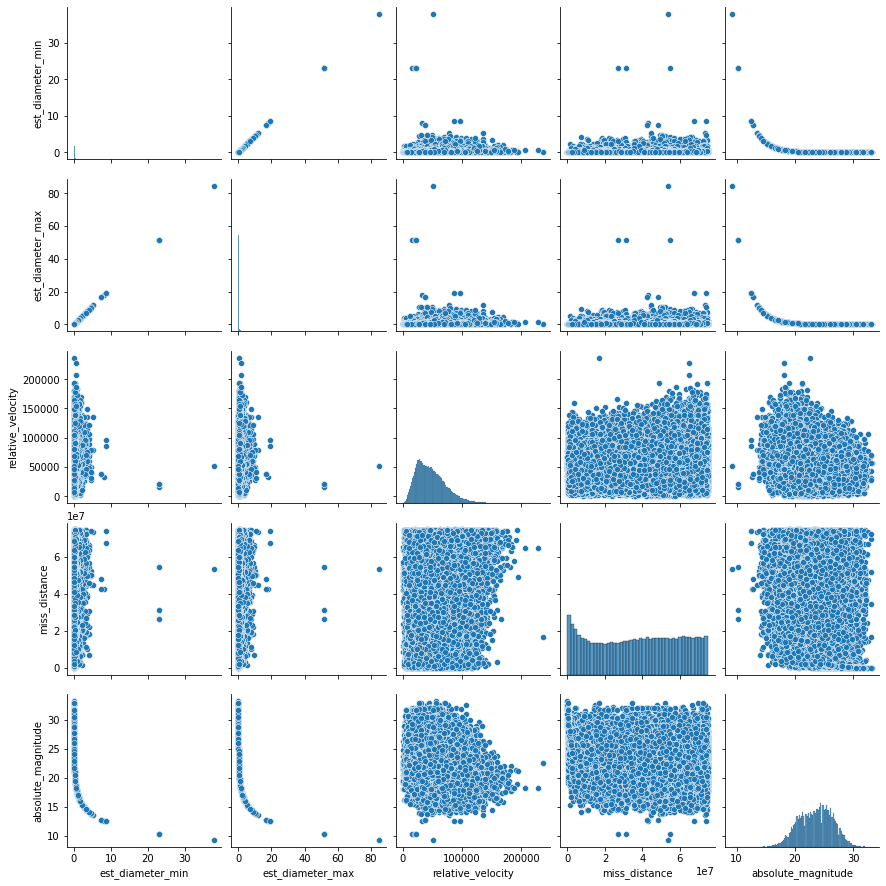

In [6]:
df_numeric=df[['est_diameter_min', 'est_diameter_max','relative_velocity', 'miss_distance','absolute_magnitude']]

sns.pairplot(df_numeric)

In [7]:
# We can see a linear relation between max and min diameter.
# Luminosity falling exponentially as diameter increases.
# No other apparent correlation from above pairplot.

In [8]:
# The max and min estimated diameter is linearly related. Maybe ellipsoid shape (approximately)?
x=np.array(df.est_diameter_max).reshape(-1,1)
y=np.array(df.est_diameter_min).reshape(-1,1)
model=LinearRegression().fit(x,y)
print(model.score(x,y),model.coef_,model.intercept_) 
# shows a perfect linear relation with ~0 intercept and slope of 0.45

1.0 [[0.4472136]] [3.61016772e-13]


In [9]:
# A classification using GradientBoosting Classifier to learn hazardious state of a given astroid.

In [10]:
X=df.drop(['id','name','est_diameter_max','orbiting_body','sentry_object','hazardous'],axis=1) 
# diameter max dropped as it is linear to est_diameter_min
y=df.hazardous.astype('int')
print(X.shape,y.shape)

(90836, 4) (90836,)


In [11]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix

In [12]:
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.2, random_state=123,stratify=y)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(72668, 4) (18168, 4) (72668,) (18168,)


In [13]:
model=GradientBoostingClassifier(random_state=123).fit(X_train,y_train)

In [14]:
model.score(X_train,y_train) # 91.4% train accuracy

0.9140887323168382

In [15]:
model.score(X_test,y_test) # 91.3% test accuracy.

0.9133091149273448

In [16]:
y_pred=model.predict(X_test)
tn, fp, fn, tp=confusion_matrix(y_test,y_pred).ravel()

In [17]:
print(f"True Positive Rate:{tp/(tp+fp)}, True Negative Rate:{tn/(fn+tn)}")

True Positive Rate:0.8063492063492064, True Negative Rate:0.9151963255475271


In [18]:
# Here we see that hazardious objects are correctly identified with 80.6% of the times,
# whereas non-hazardious objects are correctly identified 91.5% of times.
# Need to improve on the recall rate (True positive Rate).
# XGBoost or Neural Network would be the next step. :)